In [6]:
#pip install keras

In [7]:
from keras.models import Sequential 

from keras.preprocessing.image import ImageDataGenerator as idg
from tensorflow import keras
from matplotlib import pyplot as plt
import os
import numpy as np
import random

In [8]:
#The dimensions of images are specified as per the training dataset
train_img_height = 48
train_img_width = 48
no_of_images_per_cycle = 32 #Specifies the number of images per batch
dataset_for_training = 'C:/Users/lazer/Downloads/archive/train'
dataset_for_testing = 'C:/Users/lazer/Downloads/archive/test'

'''As there are 1000s of images, we define a datagenerator for feeding the input images to our classification model
   We perform various operations on the image in order to yeils maximum accuracy''' 

datagenerator_train = keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
datagenerator_test = keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
#Training the data generator
training_datagenerator_for_train = datagenerator_train.flow_from_directory(dataset_for_training, target_size=(train_img_height,train_img_width),batch_size = no_of_images_per_cycle,class_mode='categorical',shuffle=True)
training_datagenerator_for_test = datagenerator_test.flow_from_directory(dataset_for_testing, target_size=(train_img_height,train_img_width),batch_size = no_of_images_per_cycle,class_mode='categorical',shuffle=True)



Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


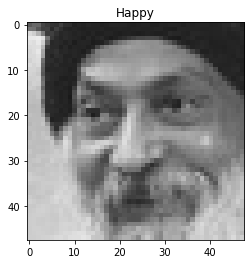

ValueError: cannot reshape array of size 221184 into shape (221184,224,224,3)

In [30]:
emotion_classes = ['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']
img,label = training_datagenerator_for_train.__next__() #Taking the next batch from the dataset
x=random.randint(0, img.shape[0]-1) #Random number from 0 to 47
image = img[x] #Accessing xth element in image matrix
emotion = emotion_classes[label[x].argmax()] #Accessing the maximum value from label and its corresponding emotion from emotion_classes
plt.imshow(image)
plt.title(emotion)
plt.show()
#img = np.array(img).reshape(221184,224,224,3)

In [28]:
'''from keras.layers import Dense,Dropout,Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D 
cnn = Sequential()

cnn.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))

cnn.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.1))

cnn.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.1))

cnn.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.1))

cnn.add(Flatten())
cnn.add(Dense(512, activation='relu'))
cnn.add(Dropout(0.1))

cnn.add(Dense(7, activation='softmax'))

cnn.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(cnn.summary())'''

import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

cnn_model = tf.keras.applications.MobileNetV2()
#cnn_model.summary()

In [19]:
base_input = cnn_model.layers[0].input
base_output = cnn_model.layers[-2].output


In [21]:
final_output = layers.Dense(128)(base_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7,activation='softmax')(final_output)


In [23]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_4')>

In [24]:
new_model = keras.Model(inputs = base_input, outputs = final_output)
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [26]:
new_model.compile(loss='sparse_categorical_crossentropy', optimizer= 'adam', metrics= ['accuracy'])

In [27]:
new_model.fit(img,label,epochs=25)

Epoch 1/25


ValueError: in user code:

    File "C:\Users\lazer\anaconda3\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\lazer\anaconda3\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\lazer\anaconda3\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\lazer\anaconda3\lib\site-packages\keras\engine\training.py", line 889, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\lazer\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\lazer\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "model" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(32, 48, 48, 3)


In [11]:
'''Training the Convolutional Neural Network'''
dataset_for_training_cnn = 'C:/Users/lazer/Downloads/archive/train'
dataset_for_testing_cnn = 'C:/Users/lazer/Downloads/archive/test'

cnn.save('Emotion_Recognition_CNN_Model.h5')

In [15]:
from keras.models import load_model


#Test the model
my_model = load_model('C:/Users/lazer/Downloads/Emotion_Recognition_CNN_Model.h5', compile=False)

#Generate a batch of images
test_img, test_lbl = training_datagenerator_for_test.__next__()
predictions=my_model.predict(test_img)

predictions = np.argmax(predictions, axis=1)
test_labels = np.argmax(test_lbl, axis=1)

from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, predictions))

#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, predictions)
#print(cm)

class_labels=['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']
#Check results on a few select images
n=random.randint(0, test_img.shape[0] - 1)
image = test_img[n]
orig_labl = class_labels[test_labels[n]]
pred_labl = class_labels[predictions[n]]
plt.imshow(image[:,:,0], cmap='gray')
plt.title("Original label is:"+orig_labl+" Predicted is: "+ pred_labl)
plt.show()

ValueError: in user code:

    File "C:\Users\lazer\anaconda3\lib\site-packages\keras\engine\training.py", line 1845, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\lazer\anaconda3\lib\site-packages\keras\engine\training.py", line 1834, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\lazer\anaconda3\lib\site-packages\keras\engine\training.py", line 1823, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\lazer\anaconda3\lib\site-packages\keras\engine\training.py", line 1791, in predict_step
        return self(x, training=False)
    File "C:\Users\lazer\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\lazer\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 248, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential" (type Sequential).
    
    Input 0 of layer "conv2d" is incompatible with the layer: expected axis -1 of input shape to have value 1, but received input with shape (32, 48, 48, 3)
    
    Call arguments received by layer "sequential" (type Sequential):
      • inputs=tf.Tensor(shape=(32, 48, 48, 3), dtype=float32)
      • training=False
      • mask=None
